In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'SuperStore_Sales_Dataset.csv')
pd.set_option('display.max_columns', None)

In [3]:
data

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.980,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2,-5.2640,NaN,Online,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,907,CA-2020-143259,30-12-2020,03-01-2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4,12.1176,NaN,COD,NaN,NaN
5897,1297,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,1.0,Online,NaN,NaN
5898,5092,CA-2020-156720,30-12-2020,03-01-2021,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,NaN,Online,NaN,NaN
5899,909,CA-2020-143259,30-12-2020,03-01-2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,462.776,3,19.7910,NaN,COD,NaN,NaN


In [4]:
pd.Series(data.columns)

0     Row ID+O6G3A1:R6
1             Order ID
2           Order Date
3            Ship Date
4            Ship Mode
5          Customer ID
6        Customer Name
7              Segment
8              Country
9                 City
10               State
11              Region
12          Product ID
13            Category
14        Sub-Category
15        Product Name
16               Sales
17            Quantity
18              Profit
19             Returns
20        Payment Mode
21                ind1
22                ind2
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [6]:
data.drop(columns = ['ind1','ind2'], inplace = True)

In [7]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])


C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2222965496.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Order Date'] = pd.to_datetime(data['Order Date'])
C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2222965496.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Ship Date'] = pd.to_datetime(data['Ship Date'])


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  5901 non-null   int64         
 1   Order ID          5901 non-null   object        
 2   Order Date        5901 non-null   datetime64[ns]
 3   Ship Date         5901 non-null   datetime64[ns]
 4   Ship Mode         5901 non-null   object        
 5   Customer ID       5901 non-null   object        
 6   Customer Name     5901 non-null   object        
 7   Segment           5901 non-null   object        
 8   Country           5901 non-null   object        
 9   City              5901 non-null   object        
 10  State             5901 non-null   object        
 11  Region            5901 non-null   object        
 12  Product ID        5901 non-null   object        
 13  Category          5901 non-null   object        
 14  Sub-Category      5901 n

In [9]:
y2019 = data[data['Order Date'].dt.year.isin([2019])]
y2020 = data[data['Order Date'].dt.year.isin([2020])]

In [10]:
data.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode'],
      dtype='object')

In [11]:
october_data2019 = y2019[y2019['Order Date'].dt.month == 10]
october_data2020 = y2020[y2020['Order Date'].dt.month == 10]

In [12]:
october_data2019
october_data2020

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
2776,1535,CA-2020-124086,2020-10-02,2020-02-14,Standard Class,MP-18175,Mike Pelletier,Home Office,United States,Laguna Niguel,California,West,FUR-BO-10004015,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish",226.983,2,16.7986,NaN,COD
2777,2368,CA-2020-123659,2020-10-02,2020-02-13,First Class,MN-17935,Michael Nguyen,Consumer,United States,Clinton,Maryland,East,OFF-PA-10002464,Office Supplies,Paper,HP Office Recycled Paper (20Lb. and 87 Bright),1958.120,4,11.3288,NaN,COD
2903,6689,CA-2020-140494,2020-10-03,2020-03-15,Second Class,CM-11815,Candace McMahon,Corporate,United States,San Francisco,California,West,TEC-AC-10004568,Technology,Accessories,Maxell LTO Ultrium - 800 GB,123.960,4,21.2724,NaN,Online
2904,8413,CA-2020-132290,2020-10-03,2020-03-14,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Dallas,Texas,Central,FUR-TA-10002228,Furniture,Tables,"Bevis Traditional Conference Table Top, Plinth...",948.408,4,-173.3472,NaN,Online
2905,1256,CA-2020-144638,2020-10-03,2020-03-14,Standard Class,MH-18115,Mick Hernandez,Home Office,United States,Chester,Pennsylvania,East,FUR-FU-10003724,Furniture,Furnishings,Westinghouse Clip-On Gooseneck Lamps,81.696,1,0.5022,NaN,COD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5652,1509,CA-2020-108294,2020-10-12,2020-10-12,Same Day,LS-16975,Lindsay Shagiari,Home Office,United States,Omaha,Nebraska,Central,OFF-BI-10004965,Office Supplies,Binders,Ibico Covers for Plastic or Wire Binding Elements,301.500,3,15.5250,1.0,Online
5653,2773,CA-2020-158967,2020-10-12,2020-12-12,First Class,BT-11680,Brian Thompson,Consumer,United States,Fort Lauderdale,Florida,South,FUR-FU-10001940,Furniture,Furnishings,Staple-based wall hangings,396.104,3,5.7312,NaN,Cards
5654,1059,CA-2020-167150,2020-10-12,2020-12-17,Standard Class,BP-11185,Ben Peterman,Corporate,United States,San Diego,California,West,OFF-BI-10001597,Office Supplies,Binders,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",147.568,2,22.9488,NaN,COD
5655,3246,US-2020-140907,2020-10-12,2020-12-12,Second Class,BP-11185,Ben Peterman,Corporate,United States,Seattle,Washington,West,TEC-AC-10004510,Technology,Accessories,Logitech Desktop MK120 Mouse and keyboard Combo,447.080,3,4.9080,NaN,Online


In [13]:
oct19city = october_data2019.City.unique()
oct19city.shape

(67,)

In [14]:
year19city = y2019.City.unique()
year19city.shape

(320,)

In [15]:
year20city = y2020.City.unique()
year20city.shape

(350,)

In [16]:
oct20city = october_data2019.City.unique()
oct20city.shape

(67,)

In [17]:
city = np.intersect1d(oct20city, oct19city, assume_unique=True)
city.shape

(67,)

In [18]:
city

array(['Appleton', 'Arlington', 'Aurora', 'Bakersfield', 'Baltimore',
       'Belleville', 'Boynton Beach', 'Bridgeton', 'Bristol', 'Chicago',
       'Columbia', 'Columbus', 'Dallas', 'Denver', 'Detroit', 'Edmonds',
       'El Cajon', 'Fort Lauderdale', 'Fresno', 'Glendale', 'Greensboro',
       'Greenville', 'Greenwood', 'Hampton', 'Hollywood', 'Houston',
       'Jackson', 'Jacksonville', 'La Porte', 'Lakewood', 'Lansing',
       'Laredo', 'Lebanon', 'Long Beach', 'Longview', 'Los Angeles',
       'Manchester', 'Mesa', 'Miami', 'New York City', 'Newark',
       'North Las Vegas', 'Oklahoma City', 'Perth Amboy', 'Philadelphia',
       'Richmond', 'Riverside', 'Rochester', 'Roseville', 'Sacramento',
       'Salt Lake City', 'San Antonio', 'San Diego', 'San Francisco',
       'San Luis Obispo', 'Seattle', 'Springfield', 'Sterling Heights',
       'Tampa', 'Tempe', 'Toledo', 'Trenton', 'Troy', 'Tulsa',
       'Warner Robins', 'Watertown', 'Yuma'], dtype=object)

In [19]:
symmetric_difference = np.setxor1d(oct20city, oct19city)

In [20]:
symmetric_difference

array([], dtype=object)

In [21]:
october_data2019.groupby('City').sum().reset_index().sort_values(by = 'Profit',ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\1298464639.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  october_data2019.groupby('City').sum().reset_index().sort_values(by = 'Profit',ascending = False)


,City,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
41,North Las Vegas,23454,4685.076,12,1691.3097,0.0
35,Los Angeles,141464,13278.242,102,1547.6515,0.0
39,New York City,170725,4206.542,109,1189.6874,0.0
10,Columbia,17781,2377.560,10,972.2454,0.0
53,San Francisco,84673,3823.368,78,678.7686,0.0
...,...,...,...,...,...,...
31,Laredo,10830,362.342,18,-133.2227,0.0
13,Denver,23907,227.658,5,-180.2625,0.0
29,Lakewood,6286,661.176,2,-231.4116,0.0
44,Philadelphia,26581,1642.422,19,-441.8017,0.0


In [22]:
october_data2020.groupby('City').sum().reset_index().sort_values(by = 'Profit',ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\670090447.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  october_data2020.groupby('City').sum().reset_index().sort_values(by = 'Profit',ascending = False)


,City,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
45,New York City,47857,7059.534,58,5514.8316,0.0
60,Sacramento,26574,5473.884,13,1938.3776,0.0
63,San Francisco,55550,4211.529,70,701.8985,10.0
11,Columbus,17532,2027.620,23,457.4898,0.0
42,Muskogee,3663,1768.030,9,437.2856,0.0
...,...,...,...,...,...,...
59,Round Rock,3317,353.960,5,-427.4500,0.0
78,Yuma,7282,645.985,5,-479.9880,0.0
10,Columbia,18875,2199.446,16,-946.0295,0.0
8,Chicago,45378,2139.633,28,-1294.2027,0.0


In [23]:
oct19states = october_data2019.State.unique()
oct19states.shape
oct19states

array(['Washington', 'New York', 'Pennsylvania', 'California', 'Arizona',
       'Ohio', 'Illinois', 'Texas', 'Tennessee', 'Florida',
       'North Carolina', 'Colorado', 'Wisconsin', 'Utah', 'Oklahoma',
       'Virginia', 'Missouri', 'New Jersey', 'Michigan', 'Connecticut',
       'Delaware', 'Maryland', 'Nevada', 'Georgia', 'Indiana'],
      dtype=object)

In [24]:
oct20states = october_data2020.State.unique()
oct20states.shape
oct20states

array(['California', 'Maryland', 'Texas', 'Pennsylvania',
       'North Carolina', 'Connecticut', 'New Jersey', 'Florida',
       'Washington', 'Michigan', 'New York', 'Illinois', 'Georgia',
       'Indiana', 'Ohio', 'Missouri', 'Massachusetts', 'Kentucky',
       'Louisiana', 'Utah', 'Arizona', 'Tennessee', 'Rhode Island',
       'Arkansas', 'Oklahoma', 'Oregon', 'Wisconsin', 'Colorado',
       'Mississippi', 'Virginia', 'Minnesota', 'Nevada', 'South Carolina',
       'Nebraska'], dtype=object)

In [25]:
states = np.intersect1d(oct20states, oct19states, assume_unique=True)
states

array(['Arizona', 'California', 'Colorado', 'Connecticut', 'Florida',
       'Georgia', 'Illinois', 'Indiana', 'Maryland', 'Michigan',
       'Missouri', 'Nevada', 'New Jersey', 'New York', 'North Carolina',
       'Ohio', 'Oklahoma', 'Pennsylvania', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Washington', 'Wisconsin'], dtype=object)

In [26]:
october_data2019.groupby('State').sum().reset_index().sort_values(by = 'Profit',ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\41413340.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  october_data2019.groupby('State').sum().reset_index().sort_values(by = 'Profit',ascending = False)


,State,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
1,California,278641,18173.008,247,2418.0945,0.0
12,Nevada,23454,4685.076,12,1691.3097,0.0
14,New York,195518,5878.826,125,1492.2662,0.0
11,Missouri,26804,2496.820,14,1028.7442,0.0
17,Oklahoma,58416,2358.470,38,557.3843,0.0
24,Wisconsin,9514,1649.750,5,544.4175,0.0
8,Indiana,3940,1424.900,5,356.2250,0.0
23,Washington,94678,1063.622,56,348.7464,0.0
3,Connecticut,1474,1179.270,17,311.3476,0.0
22,Virginia,27666,734.760,26,268.5228,0.0


In [27]:
october_data2020.groupby('State').sum().reset_index().sort_values(by = 'Profit',ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\185137770.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  october_data2020.groupby('State').sum().reset_index().sort_values(by = 'Profit',ascending = False)


,State,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
20,New York,60334,7723.4140,87,5593.9768,0.0
2,California,195596,15774.4710,173,3008.7412,16.0
8,Indiana,15201,2929.1900,30,531.0556,0.0
23,Oklahoma,17136,2555.5400,18,527.4027,0.0
10,Louisiana,27666,1811.5100,11,363.6841,0.0
15,Mississippi,20193,761.4600,18,286.0257,0.0
5,Florida,90443,4811.0580,59,265.0226,0.0
4,Connecticut,21693,1605.8400,21,248.4096,0.0
32,Washington,57547,3695.1960,47,243.6107,0.0
9,Kentucky,24839,1087.2900,31,200.2740,0.0


In [28]:
october_data2019.groupby('Segment').sum().reset_index().sort_values(by = 'Profit',ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\1859534339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  october_data2019.groupby('Segment').sum().reset_index().sort_values(by = 'Profit',ascending = False)


,Segment,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
2,Home Office,237157,19322.016,221,4231.4582,0.0
0,Consumer,556369,18928.330,445,3161.2804,0.0
1,Corporate,323875,14017.804,260,863.7289,0.0


In [29]:
october_data2020.groupby('Segment').sum().reset_index().sort_values(by = 'Profit',ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2320288087.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  october_data2020.groupby('Segment').sum().reset_index().sort_values(by = 'Profit',ascending = False)


,Segment,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
2,Home Office,181208,16194.7290,184,2684.5728,4.0
0,Consumer,537889,32503.4372,410,2163.5433,8.0
1,Corporate,461567,30607.9960,397,1723.9514,6.0


In [30]:
october_data2020.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\4094985834.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  october_data2020.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)


,Sub-Category,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
6,Copiers,2624,2212.9680,4,3919.9888,0.0
13,Phones,130913,11227.8140,110,1680.6493,2.0
1,Appliances,56696,4873.3580,49,1012.8190,1.0
12,Paper,146989,6944.0640,122,632.9708,2.0
0,Accessories,90848,3986.8980,74,490.6074,0.0
14,Storage,90328,7151.5940,89,388.9901,0.0
7,Envelopes,41897,1592.7920,34,230.2544,1.0
10,Labels,69324,1843.0100,65,199.7789,4.0
2,Art,87597,2657.3200,74,97.4936,1.0
15,Supplies,3548,133.0600,2,10.5180,0.0


# Visulizations

### Effect of city in profit

In [31]:
data1 = october_data2019.groupby('City').sum().reset_index().sort_values(by = 'Profit',ascending = False).head(10)
data2 = october_data2020.groupby('City').sum().reset_index().sort_values(by = 'Profit',ascending = False).head(10)


C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\1845002033.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = october_data2019.groupby('City').sum().reset_index().sort_values(by = 'Profit',ascending = False).head(10)
C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\1845002033.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = october_data2020.groupby('City').sum().reset_index().sort_values(by = 'Profit',ascending = False).head(10)


In [32]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming you have the data1 and data2 DataFrames as defined in your example

# # Merging the data for both years
# merged_data = data1.merge(data2, on='City', suffixes=('_2019', '_2020'))

# # Reshaping the data for Seaborn
# # reshaped_data = merged_data.melt(id_vars='City', var_name='Year', value_name='Profit').head(10)
# reshaped_data = merged_data.melt(id_vars='City', value_vars=['Profit_2019', 'Profit_2020'], 
#                                  var_name='Year', value_name='Profit')

# # Creating a figure and axes using Seaborn
# plt.figure(figsize=(12, 6))

# # Creating a clustered bar plot
# sns.barplot(x='City', y='Profit', hue='Year', data=reshaped_data)

# # Adding labels, title, and legend
# plt.xlabel('City')
# plt.ylabel('Profit')
# plt.title('Profit Comparison by City (2019 vs 2020)')
# plt.xticks(rotation=45)
# plt.legend(title='Year')

# # Display the plot
# plt.tight_layout()
# plt.show()


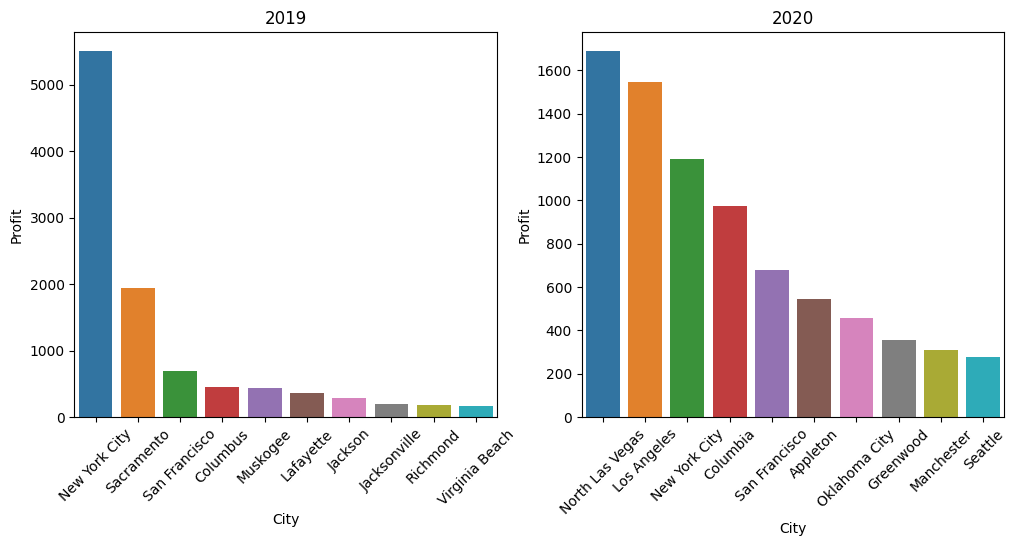

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))

sns.barplot(x = 'City', y = 'Profit' ,data = data1,ax=axes[1])

sns.barplot(x = 'City', y = 'Profit' ,data = data2,ax=axes[0])

axes[0].set_title('2019')

axes[1].set_title('2020')

# plt.xticks(rotation = 45)
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.show()




### State

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2859255623.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = october_data2019.groupby('State').sum().reset_index().sort_values(by = 'Profit',ascending = False).head(10)
C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2859255623.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = october_data2020.groupby('State').sum().reset_index().sort_values(by = 'Profit',ascending = False).head(10)


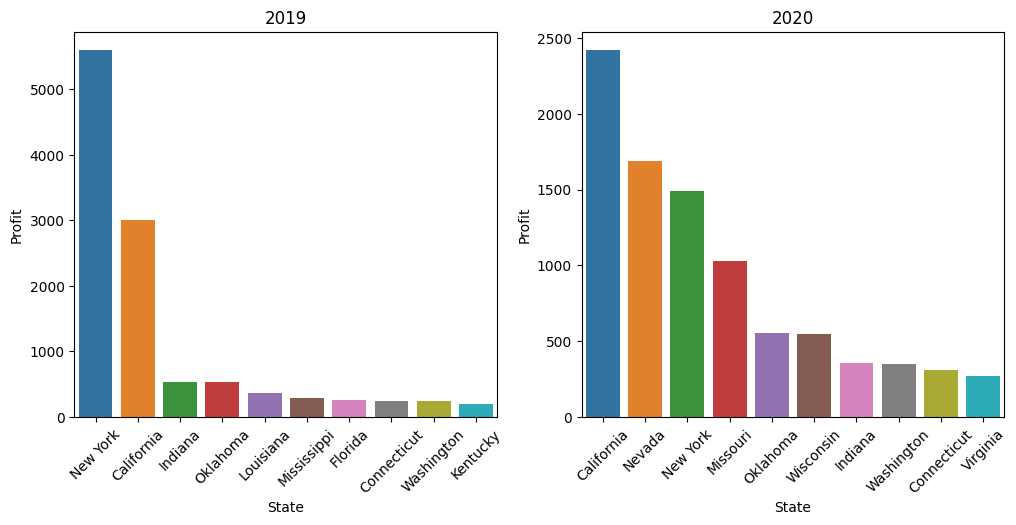

In [34]:
data1 = october_data2019.groupby('State').sum().reset_index().sort_values(by = 'Profit',ascending = False).head(10)
data2 = october_data2020.groupby('State').sum().reset_index().sort_values(by = 'Profit',ascending = False).head(10)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))

sns.barplot(x = 'State', y = 'Profit' ,data = data1,ax=axes[1])

sns.barplot(x = 'State', y = 'Profit' ,data = data2,ax=axes[0])

axes[0].set_title('2019')

axes[1].set_title('2020')
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.show()
 

### Sub-Categories

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\157618719.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = october_data2019.groupby('Segment').sum().reset_index().sort_values(by='Profit', ascending=False).head(10)
C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\157618719.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = october_data2020.groupby('Segment').sum().reset_index().sort_values(by='Profit', ascending=False).head(10)


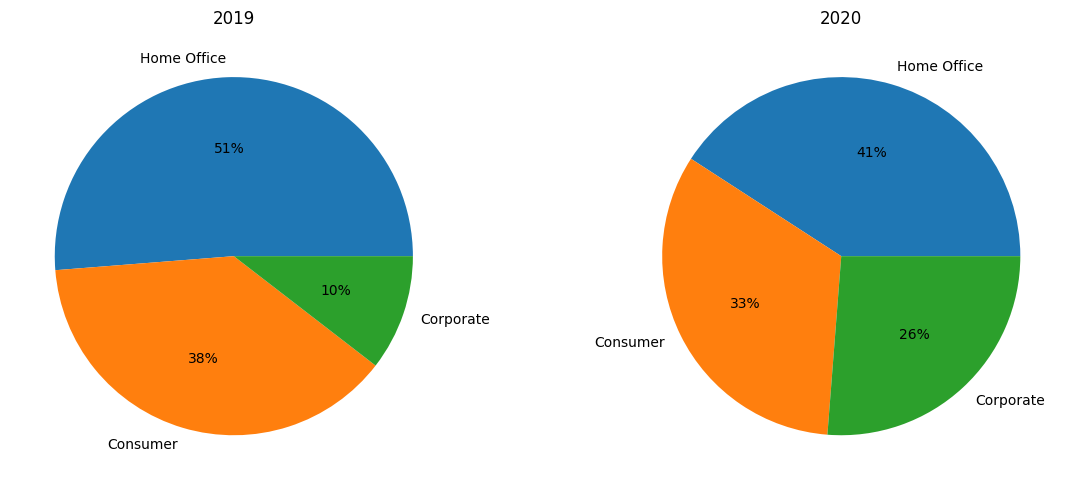

In [35]:
data1 = october_data2019.groupby('Segment').sum().reset_index().sort_values(by='Profit', ascending=False).head(10)
data2 = october_data2020.groupby('Segment').sum().reset_index().sort_values(by='Profit', ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot pie charts on subplots
axes[0].pie(data1['Profit'], autopct='%.0f%%', labels=data1['Segment'])
axes[1].pie(data2['Profit'], autopct='%.0f%%', labels=data2['Segment'])

# Set titles for subplots
axes[0].set_title('2019')
axes[1].set_title('2020')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [36]:
october_data2019['Sales'].sum()
# october_data2020

52268.149999999994

In [37]:
october_data2019['Profit'].sum()


8256.467499999999

In [38]:
october_data2020['Sales'].sum()


79306.1622

In [39]:
october_data2020['Profit'].sum()


6572.067499999999

In [40]:
Noctober_data2019 = y2019[y2019['Order Date'].dt.month != 10]
Noctober_data2019

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,2019-01-01,2019-07-01,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1,28.2668,NaN,Online
1,4919,CA-2019-160304,2019-02-01,2019-07-01,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,NaN,Online
2,4920,CA-2019-160304,2019-02-01,2019-07-01,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,Maryland,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.980,2,67.2742,NaN,Cards
3,3074,CA-2019-125206,2019-03-01,2019-05-01,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,California,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,NaN,Online
4,8604,US-2019-116365,2019-03-01,2019-08-01,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,Texas,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2,-5.2640,NaN,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2583,6342,US-2019-105830,2019-12-31,2020-02-01,First Class,DB-13660,Duane Benoit,Consumer,United States,Lancaster,Ohio,East,OFF-ST-10002554,Office Supplies,Storage,Tennsco Industrial Shelving,156.512,4,-35.2152,NaN,Online
2584,4613,US-2019-165953,2019-12-31,2020-06-01,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,South,OFF-AR-10000588,Office Supplies,Art,Newell 345,47.616,3,3.5712,NaN,Online
2585,5739,CA-2019-156139,2019-12-31,2020-06-01,Standard Class,BP-11155,Becky Pak,Consumer,United States,San Francisco,California,West,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376,3,13.4316,NaN,COD
2586,4614,US-2019-165953,2019-12-31,2020-06-01,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,Florida,South,OFF-PA-10002250,Office Supplies,Paper,Things To Do Today Pad,23.480,5,8.2180,NaN,Online


In [41]:
Noctober_data2019.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit', ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\1877146908.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Noctober_data2019.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit', ascending = False)


,Sub-Category,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
6,Copiers,91751,24699.4100,69,17742.7926,0.0
0,Accessories,837033,37899.7780,621,8714.3813,0.0
13,Phones,1009701,65231.0860,741,8183.4615,0.0
12,Paper,1576942,19625.1080,1213,8161.1179,0.0
3,Binders,1826784,35332.0930,1456,7830.3368,0.0
14,Storage,868788,51012.9980,706,5482.4150,0.0
5,Chairs,756410,75970.5740,564,5093.4953,0.0
1,Appliances,536007,21476.2850,359,4120.7235,0.0
9,Furnishings,1234580,25267.4540,926,3456.3533,0.0
11,Machines,157885,48207.2950,123,2848.7796,0.0


In [42]:
october_data2020.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit', ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\1748234094.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  october_data2020.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit', ascending = False)


,Sub-Category,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
6,Copiers,2624,2212.9680,4,3919.9888,0.0
13,Phones,130913,11227.8140,110,1680.6493,2.0
1,Appliances,56696,4873.3580,49,1012.8190,1.0
12,Paper,146989,6944.0640,122,632.9708,2.0
0,Accessories,90848,3986.8980,74,490.6074,0.0
14,Storage,90328,7151.5940,89,388.9901,0.0
7,Envelopes,41897,1592.7920,34,230.2544,1.0
10,Labels,69324,1843.0100,65,199.7789,4.0
2,Art,87597,2657.3200,74,97.4936,1.0
15,Supplies,3548,133.0600,2,10.5180,0.0


In [43]:
october_data2019.groupby('Category').sum().reset_index().sort_values(by = 'Profit', ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2410674733.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  october_data2019.groupby('Category').sum().reset_index().sort_values(by = 'Profit', ascending = False)


,Category,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
1,Office Supplies,679143,20224.188,592,5663.0754,0.0
2,Technology,199649,18426.611,144,2284.5770,0.0
0,Furniture,238609,13617.351,190,308.8151,0.0


In [44]:
october_data2020.groupby('Category').sum().reset_index().sort_values(by = 'Profit', ascending = False)

C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2624862287.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  october_data2020.groupby('Category').sum().reset_index().sort_values(by = 'Profit', ascending = False)


,Category,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
2,Technology,233032,18206.6590,195,5547.2615,2.0
1,Office Supplies,696533,39617.1320,600,2292.2831,11.0
0,Furniture,251099,21482.3712,196,-1267.4771,5.0


C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\4159137439.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = october_data2019.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)
C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\4159137439.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = october_data2020.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)


   Sub-Category  Row ID+O6G3A1:R6      Sales  Quantity     Profit  Returns
3       Binders            199089   7351.232       147  2385.2973      0.0
12       Phones            101990  10730.944        77  1276.1314      0.0
1    Appliances             40838   3574.030        37  1180.6180      0.0
0   Accessories             82320   3996.076        61   949.9072      0.0
11        Paper            166239   2036.786       159   910.4166      0.0
13      Storage             99350   5775.702       102   721.8718      0.0
5        Chairs             75711   5948.071        50   669.6586      0.0
8   Furnishings            107790   2606.670       110   478.9167      0.0
6     Envelopes             17134    470.540        16   210.9834      0.0
4     Bookcases             36589   1895.192        13   146.5746      0.0
   Sub-Category  Row ID+O6G3A1:R6      Sales  Quantity     Profit  Returns
6       Copiers              2624   2212.968         4  3919.9888      0.0
13       Phones          

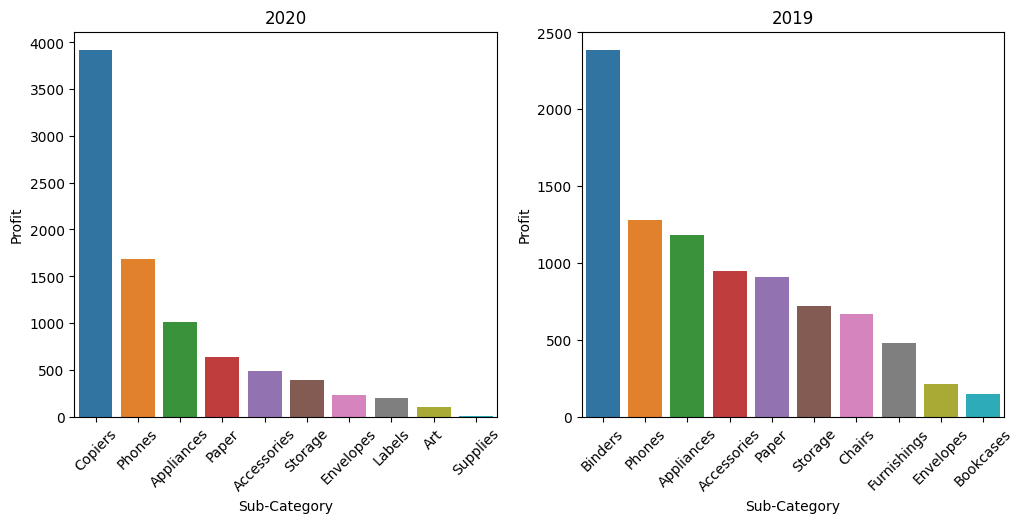

In [45]:
data1 = october_data2019.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)
data1=data1.head(10)
data2 = october_data2020.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)
data2=data2.head(10)

print(data1)
print(data2)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))

sns.barplot(x = 'Sub-Category', y = 'Profit' ,data = data1,ax=axes[1])

sns.barplot(x = 'Sub-Category', y = 'Profit' ,data = data2,ax=axes[0])

axes[0].set_title('2020')

axes[1].set_title('2019')

# plt.xticks(rotation = 45)
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.show()


C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2149038195.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = october_data2019.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)
C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2149038195.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = october_data2020.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)


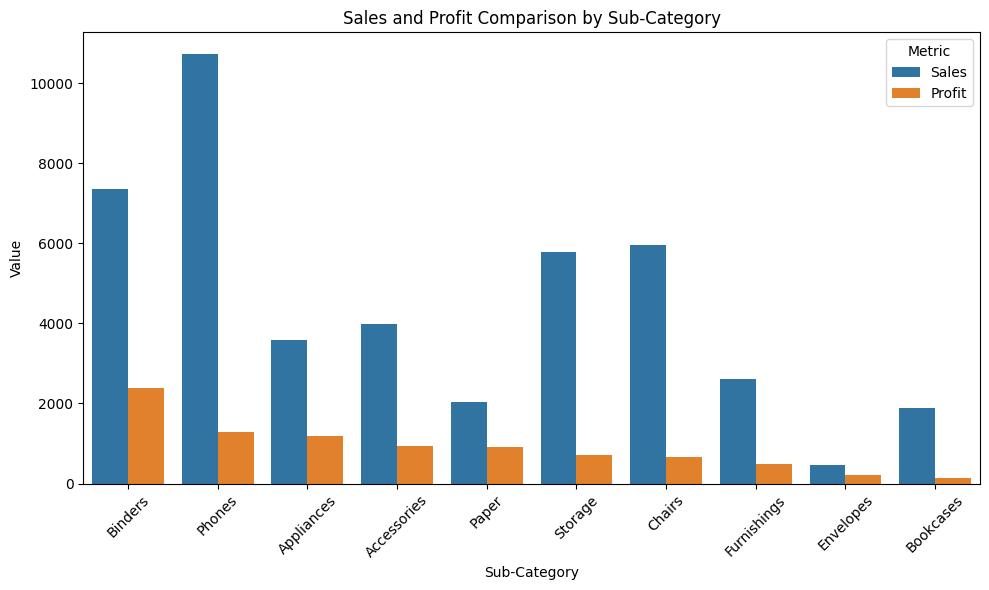

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data1 = october_data2019.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)
data1=data1.head(10)
data2 = october_data2020.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)
data2=data2.head(10)
melted_data = data1.melt(id_vars='Sub-Category', var_name='Metric', value_vars=['Sales', 'Profit'])

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='value', hue='Metric', data=melted_data)
plt.title('Sales and Profit Comparison by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2191174078.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data1 = october_data2019.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)
C:\Users\Parn\AppData\Local\Temp\ipykernel_3864\2191174078.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = october_data2020.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)


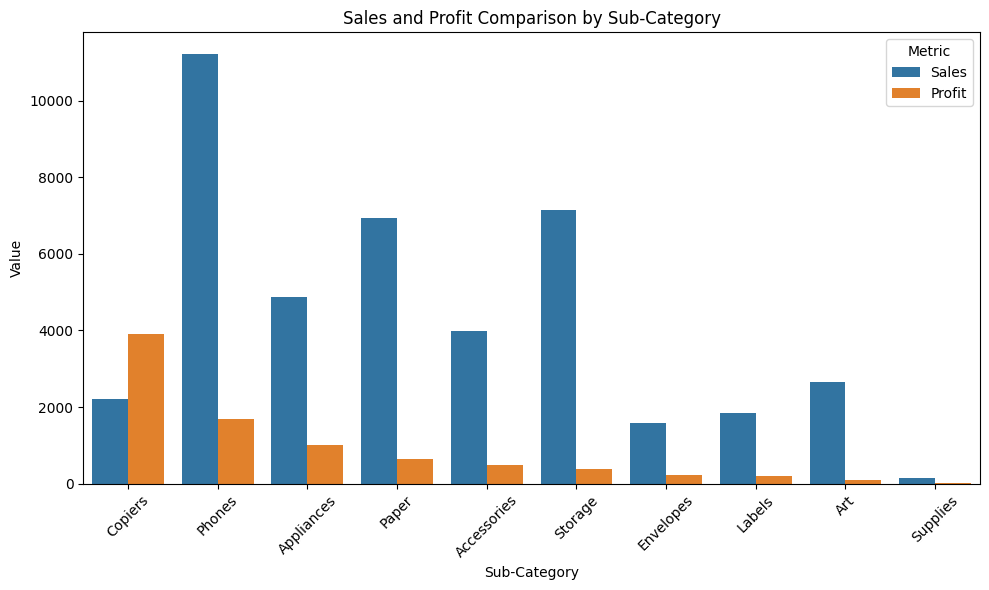

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data1 = october_data2019.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)
data1=data1.head(10)
data2 = october_data2020.groupby('Sub-Category').sum().reset_index().sort_values(by = 'Profit',ascending = False)
data2=data2.head(10)
melted_data = data2.melt(id_vars='Sub-Category', var_name='Metric', value_vars=['Sales', 'Profit'])

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Sub-Category', y='value', hue='Metric', data=melted_data)
plt.title('Sales and Profit Comparison by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [54]:
october_summary_2019= october_data2019.groupby(october_data2019['Order Date'].dt.month).agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()
# october_summary_2020 = october_data2020.groupby(['Year', 'Month']).agg({'Sales': 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index()
# october_data2019
october_summary_2019

,Order Date,Sales,Profit,Quantity
0,10,52268.15,8256.4675,926


In [51]:
october_data2019

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
26,4667,CA-2019-116547,2019-10-01,2019-01-17,Standard Class,KB-16585,Ken Black,Corporate,United States,Seattle,Washington,West,FUR-FU-10000076,Furniture,Furnishings,24-Hour Round Wall Clock,79.920,4,34.3656,NaN,Cards
27,4668,CA-2019-116547,2019-10-01,2019-01-17,Standard Class,KB-16585,Ken Black,Corporate,United States,Seattle,Washington,West,TEC-AC-10002335,Technology,Accessories,Logitech Media Keyboard K200,69.980,2,13.2962,NaN,COD
28,6970,CA-2019-163937,2019-10-01,2019-01-13,Second Class,JB-16000,Joy Bell-,Consumer,United States,Longview,Washington,West,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",24.850,5,7.7035,NaN,Cards
225,1876,US-2019-112977,2019-10-03,2019-03-16,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Long Beach,New York,East,FUR-BO-10003272,Furniture,Bookcases,O'Sullivan Living Dimensions 5-Shelf Bookcases,176.784,1,-22.0980,NaN,Cards
226,4063,US-2019-122182,2019-10-03,2019-03-14,Standard Class,BD-11770,Bryan Davis,Consumer,United States,Philadelphia,Pennsylvania,East,TEC-AC-10002800,Technology,Accessories,Plantronics Audio 478 Stereo USB Headset,39.992,1,7.4985,NaN,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,8188,CA-2019-127194,2019-10-12,2019-12-16,Standard Class,BW-11110,Bart Watters,Corporate,United States,New York City,New York,East,OFF-PA-10000659,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me...",62.820,9,29.5254,NaN,Cards
2377,2196,CA-2019-128412,2019-10-12,2019-12-17,Standard Class,AP-10915,Arthur Prichep,Consumer,United States,Seattle,Washington,West,TEC-AC-10003038,Technology,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,44.750,5,8.5025,NaN,Cards
2378,2195,CA-2019-128412,2019-10-12,2019-12-17,Standard Class,AP-10915,Arthur Prichep,Consumer,United States,Seattle,Washington,West,OFF-AP-10000252,Office Supplies,Appliances,Harmony HEPA Quiet Air Purifiers,35.100,3,12.2850,NaN,COD
2379,7617,CA-2019-144309,2019-10-12,2019-12-16,Standard Class,CM-12235,Chris McAfee,Consumer,United States,Watertown,New York,East,OFF-PA-10001776,Office Supplies,Paper,"Wirebound Message Books, Four 2 3/4"" x 5"" Form...",18.540,2,8.7138,NaN,COD


In [62]:
x = 12
l = [1,2,3,4]
def a(x):
    x = x+1
a(12)

def b(l):
    l.append(5)
b(l)

[1, 2, 3, 4, 5]

In [67]:
a = 50
b = a
a = 25
print(b)

# beacuse b ka refrence 50 se hay

50


In [71]:
z = 50
print(id(z))
del(z)
z = 50
print(id(z))

2063258748688
2063258748688
